# Lab 4 - Overfitting regularization

## L2 and L1 regularization for linear estimators

In this ex., we are going to learn about implementing linear regression with regularization L1 and L2 on Boston Housing dataset using scikit-learn.

The Boston Housing Dataset consists of price of houses in various places in Boston. Alongside with price, the dataset also provide information such as Crime (CRIM), areas of non-retail business in the town (INDUS), the age of people who own the house (AGE), and there are many other attributes available here.

The dataset itself is available online. However, because we are going to use scikit-learn, we can import it right away from the scikit-learn itself.

In [1]:
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()

/Library/Anaconda/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

The boston variable itself is a dictionary, so we can check for its keys using the snippet below. Explore the data.

In [2]:
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)


Analyse the dataset:

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Convert the dataset to Pandas:

In [4]:
import numpy as np
import pandas as pd
 
X = pd.DataFrame(boston.data)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Ex. 1 Split train-test dataset
As there is no column called ‘PRICE’ in the data frame - the target values are available in other attribute called target.

In [5]:
# Ex 1

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, boston.target, test_size = 0.2, random_state = 15)

In [6]:
print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

506
0.7984189723320159
0.2015810276679842


Ex. 2 Linear regression

- Import the Linear Regression:

In [7]:
# Ex 2

from sklearn.linear_model import LinearRegression

- Fit a model based on X_train and Y_train
- Predict the X_test and store the prediction values into Y_pred
- To visualize the differences between actual prices and predicted values create a scatter plot:

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

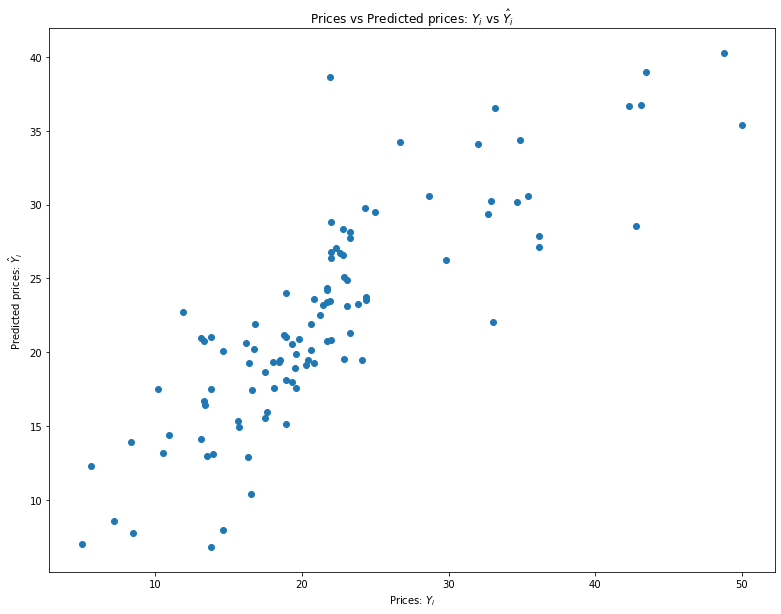

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(13, 10))
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

How should an ideal scatter look like? 

Ex. 3: To check the level of error of a model calculate the Mean Squared Error.

Ex. 4: Calculate the model.score. Check what it is for linear problems. 

In [9]:
# Ex 3

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

23.812245465080874

In [10]:
# Ex 4

reg.score(X_test, y_test)

0.6920749038652119

As the results are not good enough (low accuracy) we have to undertake following steps:

- Normalize the data using StandardScaler()
- Generate polynomial features (2nd degree polynomial) using following code:

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

scaler = StandardScaler()
polynomial_features= PolynomialFeatures(degree=2)

- Using polynomial_features.fit_transform transform the features for training and testing
- Fit and predict a new Linear model with the polynomial features
- Calculate the MSE and model score - compare with regular Linear Regression.

Mean Squared Error with regular Linear Regression: 23.81
Mean Squared Error with StandardScaler and PolynomialFeatures: 10.42
 
Model score with regular Linear Regression: 0.69
Model score with StandardScaler and PolynomialFeatures: 0.87


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

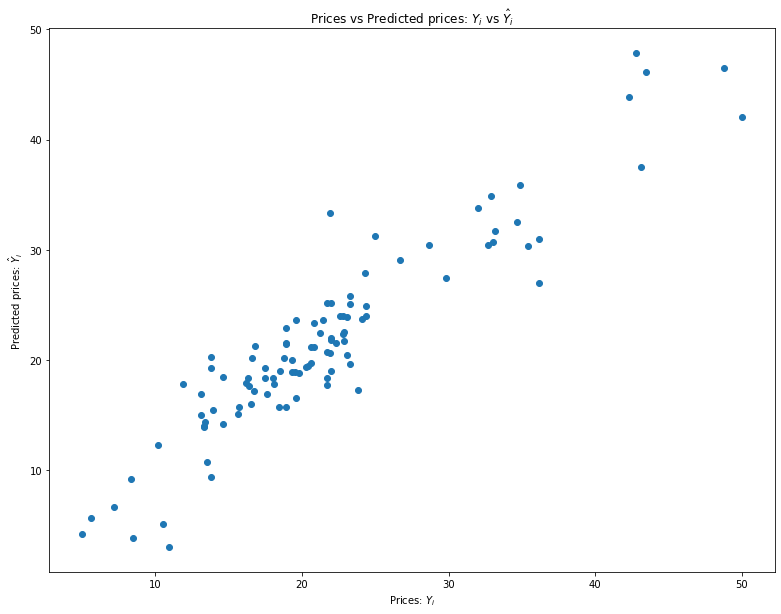

In [12]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_scaled = polynomial_features.fit_transform(X_train, y_train)
X_test_scaled = polynomial_features.fit_transform(X_test, y_test)

reg2 = LinearRegression()
reg2.fit(X_train_scaled, y_train)    
y_pred2 = reg2.predict(X_test_scaled)

print('Mean Squared Error with regular Linear Regression: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Mean Squared Error with StandardScaler and PolynomialFeatures: {:.2f}'.format(mean_squared_error(y_test, y_pred2)))
print(' ')
print('Model score with regular Linear Regression: {:.2f}'.format(reg.score(X_test, y_test)))
print('Model score with StandardScaler and PolynomialFeatures: {:.2f}'.format(reg2.score(X_test_scaled, y_test)))

figure(figsize=(13, 10))
plt.scatter(y_test, y_pred2)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

Ex. 5: Lasso 
Lasso Regression:

- Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients
- Minimization objective = LS Obj + α * (sum of absolute value of coefficients)

Please perform regularization using the Lasso method with an example alpha value equals to 0.1. 

Please draw a plot of the score on the alpha parameters to choose the best one. The parameter can take a value in the wide range, from very small values 0.001 up to 1 or even larger (it depends on the data set, model and problem).

In [13]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

print('Train score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Test score: {:.2f}'.format(lasso.score(X_test, y_test)))

Train score: 0.68
Test score: 0.66


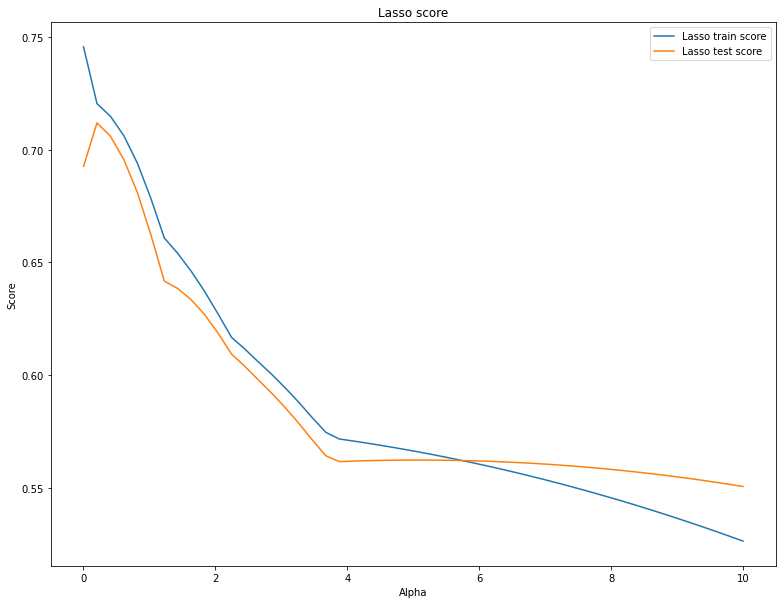

In [14]:
alphas = [i for i in np.linspace(0.001, 10)]
lasso_train_scores = []
lasso_test_scores = []

for alpha in alphas:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)
    lasso_train_scores.append(lasso.score(X_train, y_train))
    lasso_test_scores.append(lasso.score(X_test, y_test))

figure(figsize=(13, 10))
plt.plot(alphas, lasso_train_scores, label = 'Lasso train score')
plt.plot(alphas, lasso_test_scores, label = 'Lasso test score')
plt.title('Lasso score')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.legend()

Ex. 6 Ridge 
Ridge Regression:

- Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients
- Minimization objective = LS Obj + α * (sum of square of coefficients)

In [15]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.6937869418612654

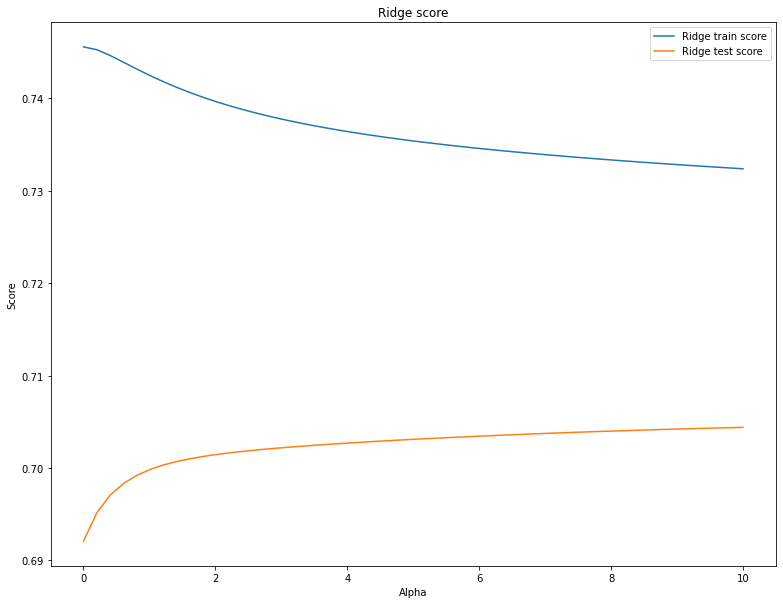

In [16]:
alphas = [i for i in np.linspace(0.001, 10)]
ridge_train_scores = []
ridge_test_scores = []

for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    ridge_train_scores.append(ridge.score(X_train, y_train))
    ridge_test_scores.append(ridge.score(X_test, y_test))

figure(figsize=(13, 10))
plt.plot(alphas, ridge_train_scores, label = 'Ridge train score')
plt.plot(alphas, ridge_test_scores, label = 'Ridge test score')
plt.title('Ridge score')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.legend()

## Regularization for logistic regression

Please choose one of the two datasets available A or B:

Dataset A:
In this exercise, we aim to perform basic data manipulation with the Breast Cancer Wisconsin (Diagnostic) Data Set provided by UCI.
The database is included in Python library:

In [17]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
 
df = pd.DataFrame(data.data)
df.columns = data.feature_names
X = df.values
y = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Additional information can be found here: Breast Cancer Wisconsin

Ex. 1: Divide the dataset into training and testing. 

Ex. 2: Using the available libraries in Python, create a logistic regression model with L1 regularization and C = 1 regularization parameter.

Ex. 3: Draw a plot of the algorithm accuracy for the L2 regularization (10 values of the regularization parameter C in the following range [0.0001; 1])

In [18]:
# Ex 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

In [19]:
# Ex 2

from sklearn.linear_model import LogisticRegression

logregL1 = LogisticRegression(penalty='l1', C = 1, solver='liblinear', max_iter = 300)
logregL1.fit(X_train, y_train)

print('Train set accuracy score of logistic regression with L1 regularization and C = 1: {:.2f}'.format(logregL1.score(X_train, y_train)))
print('Test set accuracy score of logistic regression with L1 regularization and C = 1: {:.2f}'.format(logregL1.score(X_test, y_test)))


Train set accuracy score of logistic regression with L1 regularization and C = 1: 0.97
Test set accuracy score of logistic regression with L1 regularization and C = 1: 0.89


/Library/Anaconda/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Anaconda/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

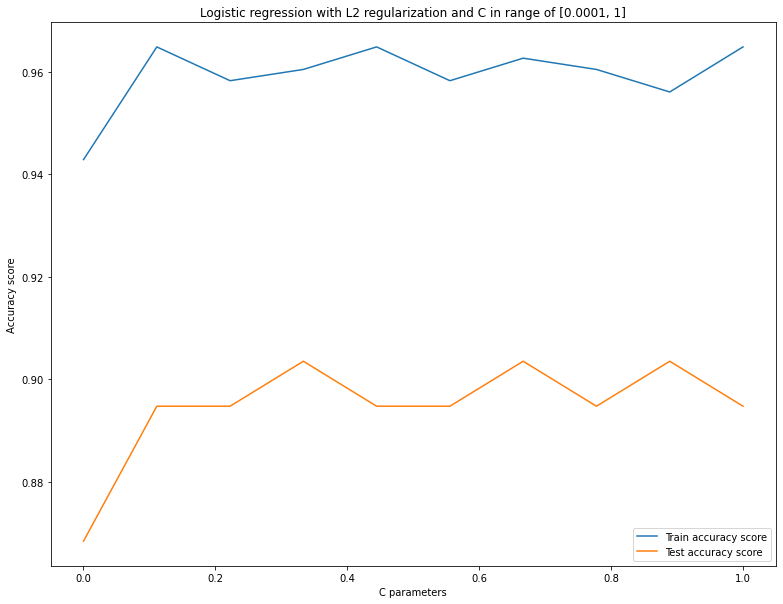

In [20]:
# Ex 3

c_params = np.linspace(0.0001, 1.0, 10)
train_accuracy_score = []
test_accuracy_score = []

for c in c_params:
    logregL2 = LogisticRegression(penalty='l2', C = c, max_iter = 100)
    logregL2.fit(X_train, y_train)
    train_accuracy_score.append(logregL2.score(X_train, y_train))
    test_accuracy_score.append(logregL2.score(X_test, y_test))

figure(figsize=(13, 10))
plt.plot(c_params, train_accuracy_score, label = 'Train accuracy score')
plt.plot(c_params, test_accuracy_score, label = 'Test accuracy score')
plt.xlabel('C parameters')
plt.ylabel('Accuracy score')
plt.title('Logistic regression with L2 regularization and C in range of [0.0001, 1]')
plt.legend()
plt.show()